In [20]:
from matplotlib import pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D , InputLayer,Reshape,Flatten,MaxPool2D,MaxPooling2D,Dropout,BatchNormalization,Activation
from keras.api._v2.keras import activations
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from keras.utils import to_categorical
from keras.optimizers import SGD , RMSprop
#Modelden resimleri çoğaltmak için
from tensorflow.keras.preprocessing.image import ImageDataGenerator , img_to_array , load_img , array_to_img
#Model değerleendirmek için kullanılacak kütüphane
from sklearn.metrics import confusion_matrix , classification_report

In [2]:
#Data Çekimi
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

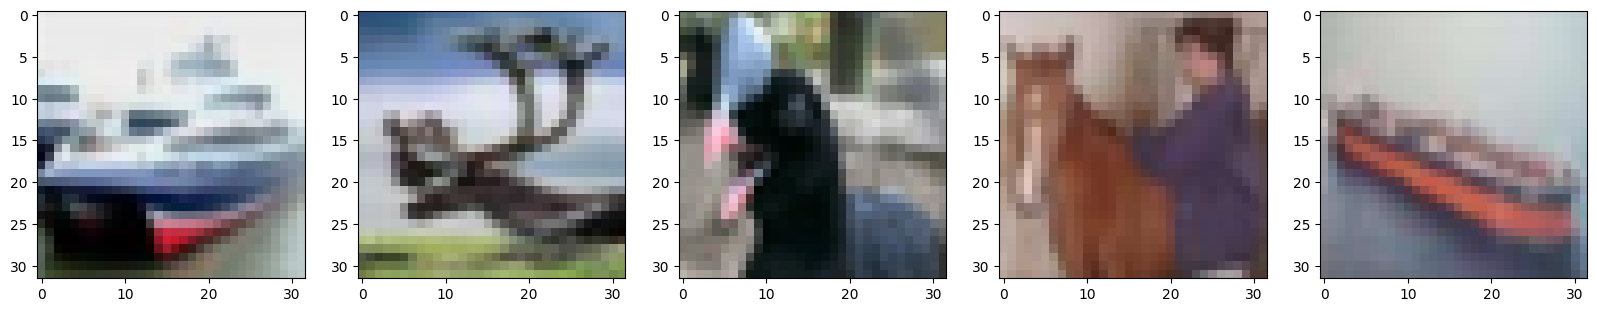

In [4]:
#Resimlerden Örnek Gösterimi
plt.figure(figsize=(20,5))
plt.subplot(1,5,1)
plt.imshow(x_test[1],cmap='gray')

plt.subplot(1,5,2)
plt.imshow(x_test[40],cmap='gray')

plt.subplot(1,5,3)
plt.imshow(x_test[776],cmap='gray')

plt.subplot(1,5,4)
plt.imshow(x_test[567],cmap='gray')

plt.subplot(1,5,5)
plt.imshow(x_test[999],cmap='gray')

In [5]:
# Benzersiz elemanları bul
category_list = np.unique(y_train)

# Kaç farklı grup olduğunu öğren
category_count = len(category_list)

y_train = to_categorical(y_train, category_count)
y_test = to_categorical(y_test, category_count)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255


datagen = ImageDataGenerator(
            featurewise_center=False,  # set input mean to 0 over the dataset
            samplewise_center=False,  # set each sample mean to 0
            featurewise_std_normalization=False,  # divide inputs by std of the dataset
            samplewise_std_normalization=False,  # divide each input by its std
            zca_whitening=False,  # apply ZCA whitening
            rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
            width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
            height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
            horizontal_flip=True,  # randomly flip images
            vertical_flip=False  # randomly flip images
        )
datagen.fit(x_train)



In [6]:
# CNN

In [7]:
input_shape = x_train[0].shape
input_shape



(32, 32, 3)

In [9]:
#Modelin Kurulması
model=Sequential() # model tanımlama yapıldı
model.add(Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(category_count))
model.add(Activation('softmax'))


In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 activation_2 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 15, 15, 32)        0         
                                                                 
 flatten_1 (Flatten)         (None, 7200)              0         
                                                      

In [13]:
#Optimasyon Metriklerin Ayarlanması
opt = RMSprop(learning_rate=1e-4)

model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])


In [15]:
## create data genera
history = model.fit(x_train, y_train, epochs=100, batch_size=64, validation_split=0.2)

Epoch 1/100
625/625 [==============================] - 88s 140ms/step - loss: 1.6980 - accuracy: 0.3996 - val_loss: 1.5305 - val_accuracy: 0.4639
Epoch 2/100
625/625 [==============================] - 62s 99ms/step - loss: 1.4743 - accuracy: 0.4752 - val_loss: 1.3944 - val_accuracy: 0.5173
Epoch 3/100
625/625 [==============================] - 62s 99ms/step - loss: 1.3652 - accuracy: 0.5168 - val_loss: 1.3038 - val_accuracy: 0.5457
Epoch 4/100
625/625 [==============================] - 64s 103ms/step - loss: 1.2832 - accuracy: 0.5475 - val_loss: 1.2612 - val_accuracy: 0.5612
Epoch 5/100
625/625 [==============================] - 82s 131ms/step - loss: 1.2187 - accuracy: 0.5696 - val_loss: 1.1999 - val_accuracy: 0.5813
Epoch 6/100
625/625 [==============================] - 91s 146ms/step - loss: 1.1652 - accuracy: 0.5896 - val_loss: 1.1688 - val_accuracy: 0.5956
Epoch 7/100
625/625 [==============================] - 73s 116ms/step - loss: 1.1194 - accuracy: 0.6080 - val_loss: 1.1345 - v

Epoch 57/100
625/625 [==============================] - 62s 100ms/step - loss: 0.2233 - accuracy: 0.9233 - val_loss: 1.0519 - val_accuracy: 0.7057
Epoch 58/100
625/625 [==============================] - 62s 99ms/step - loss: 0.2163 - accuracy: 0.9262 - val_loss: 1.0874 - val_accuracy: 0.7043
Epoch 59/100
625/625 [==============================] - 61s 98ms/step - loss: 0.2083 - accuracy: 0.9293 - val_loss: 1.0336 - val_accuracy: 0.7059
Epoch 60/100
625/625 [==============================] - 61s 98ms/step - loss: 0.2089 - accuracy: 0.9306 - val_loss: 1.0624 - val_accuracy: 0.7070
Epoch 61/100
625/625 [==============================] - 62s 99ms/step - loss: 0.2029 - accuracy: 0.9309 - val_loss: 1.0654 - val_accuracy: 0.7085
Epoch 62/100
625/625 [==============================] - 62s 99ms/step - loss: 0.1997 - accuracy: 0.9323 - val_loss: 1.0642 - val_accuracy: 0.7079
Epoch 63/100
625/625 [==============================] - 61s 98ms/step - loss: 0.1914 - accuracy: 0.9351 - val_loss: 1.1108 

Text(0.5, 1.0, 'Training and Validation Loss')

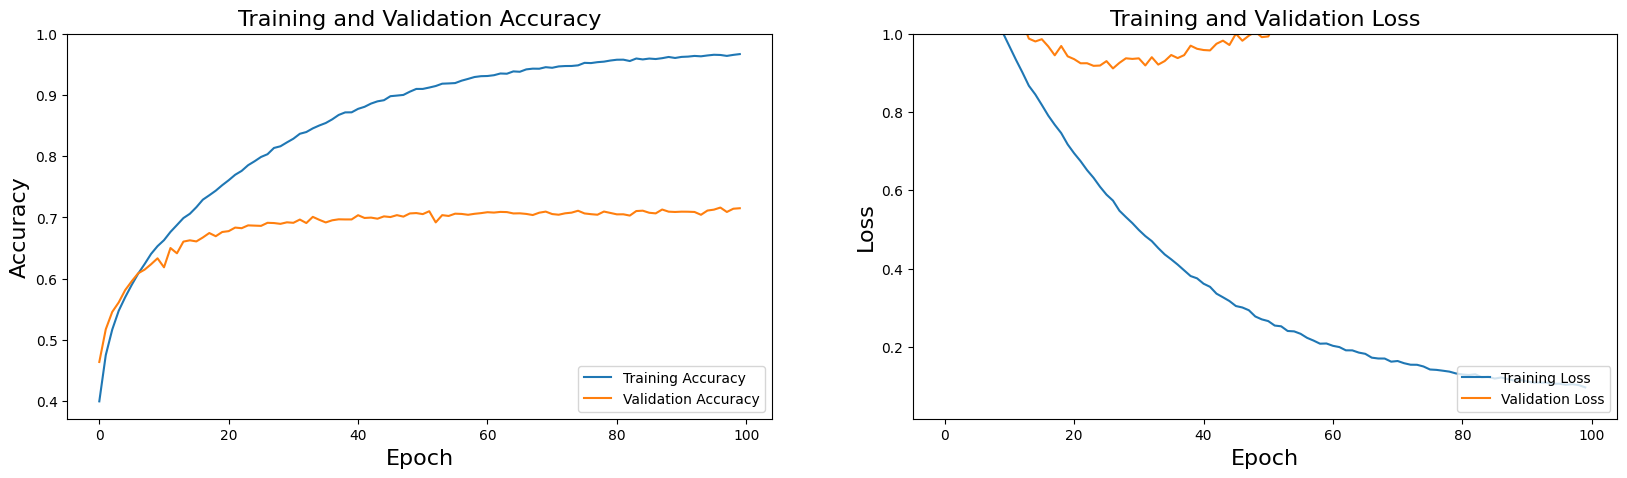

In [17]:
## ------------------------
#Accuracy Grafik
#------------------------

plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'],label='Training Accuracy')
plt.plot(history.history['val_accuracy'],label='Validation Accuracy')
plt.legend(loc='lower right')
plt.xlabel('Epoch',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy',fontsize=16)


#------------------------
#Loss Grafik
#------------------------

plt.subplot(1,2,2)
plt.plot(history.history['loss'],label='Training Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.legend(loc='lower right')
plt.xlabel('Epoch',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Loss',fontsize=16)

In [18]:
loss,accuracy = model.evaluate(x_train , y_train)

print("\nTest accuracy: %.1f%%" %(100.0*accuracy)) # Doğru Sınıflandırma Oranı
print("\nTest loss: %.1f%%" %(100.0*loss))


1563/1563 [==============================] - 24s 13ms/step - loss: 0.2597 - accuracy: 0.9428

Test accuracy: 94.3%

Test loss: 26.0%


In [19]:
#Classification Report


y_pred = model.predict(x_test);
y_pred_classes = np.argmax(y_pred, axis=1)

print(classification_report(y_test,y_pred_classes))

313/313 [==============================] - 7s 11ms/step


ValueError: Classification metrics can't handle a mix of multilabel-indicator and multiclass targets